<span style="font-size: 20px;"> Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.</span>

## Implementation

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
def data_augmentation(X, y=None, height=28, width=28, shift=1, include_original=True):
    X.reshape(X.shape[0], width, height)
    
    X_augmented = np.concat([
        X if include_original else [],
        np.concat([X[:, :, shift:], np.zeros((X.shape[0], width, shift))], axis=-1),
        np.concat([np.zeros((X.shape[0], width, shift)), X[:, :, :-shift]], axis=-1),
        np.concat([np.zeros((X.shape[0], shift, height)), X[:, :-shift, :]], axis=1),
        np.concat([X[:, shift:, :], np.zeros((X.shape[0], shift, height))], axis=1)
    ])
    
    return X_augmented if y is None else (X_augmented, np.tile(y, 5 if include_original else 4))    

## Tests

In [3]:
mnist = fetch_openml("mnist_784", as_frame=True)
X = mnist.data.to_numpy()

In [4]:
X = X.reshape(X.shape[0], 28, 28)

In [5]:
def plot_digit(digit):
    plt.imshow(digit, cmap="binary")
    plt.xticks(range(0, 29, 4))
    plt.grid("on")

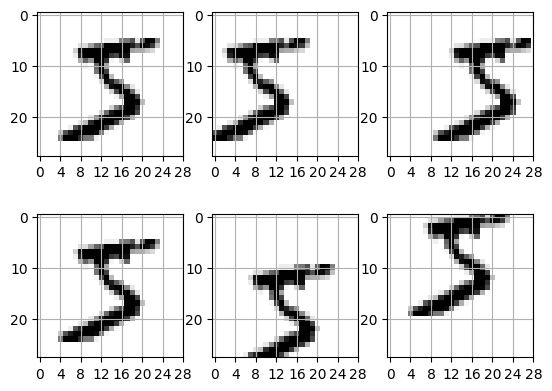

In [6]:
X_augmented = data_augmentation(X, shift=5)

plt.subplot(2, 3, 1)
plot_digit(X_augmented[70000*0])

plt.subplot(2, 3, 4)
plot_digit(X_augmented[70000*0])

plt.subplot(2, 3, 2)
plot_digit(X_augmented[70000*1])

plt.subplot(2, 3, 3)
plot_digit(X_augmented[70000*2])

plt.subplot(2, 3, 5)
plot_digit(X_augmented[70000*3])

plt.subplot(2, 3, 6)
plot_digit(X_augmented[70000*4])

## Sandbox

In [48]:
X_left = np.concat([X[:, :, 5:], np.zeros((X.shape[0], 28, 5))], axis=-1)

In [49]:
X_right = np.concat([np.zeros((X.shape[0], 28, 5)), X[:, :, :-5]], axis=-1)

In [50]:
X_left.shape

(70000, 28, 28)

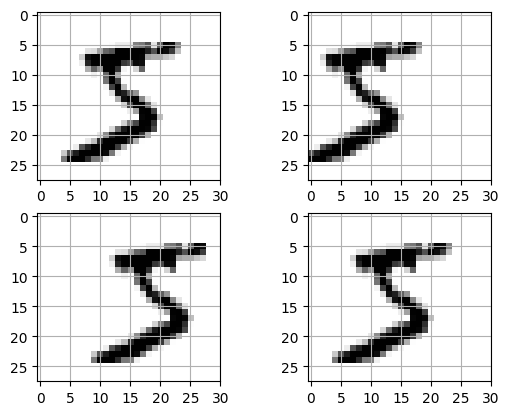

In [51]:
plt.subplot(2, 2, 1)
plot_digit(X[0])

plt.subplot(2, 2, 2)
plot_digit(X_left[0])

plt.subplot(2, 2, 3)
plot_digit(X_right[0])

plt.subplot(2, 2, 4)
plot_digit(X[0])

In [24]:
shift=5

In [39]:
X_down = np.concat([np.zeros((X.shape[0], shift, 28)), X[:, :-shift, :]], axis=1)

In [40]:
X_up = np.concat([X[:, shift:, :], np.zeros((X.shape[0], shift, 28))], axis=1)

In [41]:
X[:, shift:, :].shape

(70000, 23, 28)

In [42]:
X_up.shape

(70000, 28, 28)

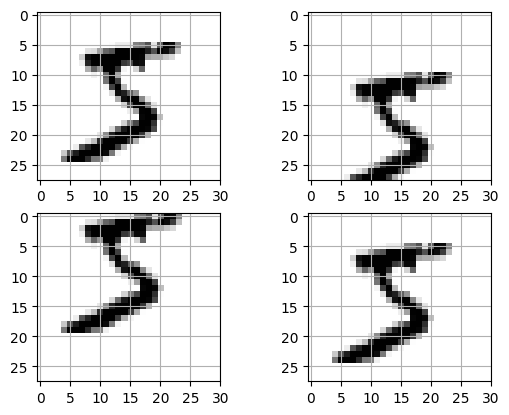

In [43]:
plt.subplot(2, 2, 1)
plot_digit(X[0])

plt.subplot(2, 2, 2)
plot_digit(X_down[0])

plt.subplot(2, 2, 3)
plot_digit(X_up[0])

plt.subplot(2, 2, 4)
plot_digit(X[0])

In [54]:
np.concat([X_down, X_up], axis=0).shape

(140000, 28, 28)

In [56]:
np.tile([1,2,3], 4)

array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])

In [67]:
X_augmented = data_augmentation(X, shift=5)

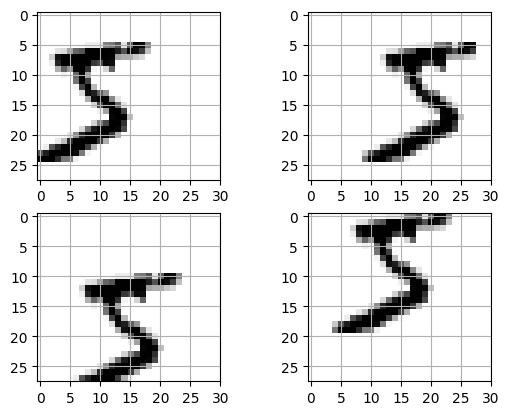

In [68]:
plt.subplot(2, 2, 1)
plot_digit(X_augmented[70000*1])

plt.subplot(2, 2, 2)
plot_digit(X_augmented[70000*2])

plt.subplot(2, 2, 3)
plot_digit(X_augmented[70000*3])

plt.subplot(2, 2, 4)
plot_digit(X_augmented[70000*4])